## Observations and Insights 

* The data shows that Capomulin was successful in bringing down the tumor volume in a mouse, significantly, in just under 50 days. (line plot)
* There was also a direct relationship between the size of the mice and the tumor volume. More obese the mouse, the larger the tumor volume. (Scatter plot)
* The box plots appear to show better results on final tumor volumes compared to that of Capomulin

In [247]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [248]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [249]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID","Timepoint"]).count().head()


Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1

In [250]:
# Optional: Get all the data for the duplicate mouse ID. 
MaskTrue = df.duplicated(subset=['Mouse ID','Timepoint'])
dupl_df = df[MaskTrue]["Mouse ID"].drop_duplicates()

In [251]:
dupl_df

909    g989
Name: Mouse ID, dtype: object

In [252]:
len(df)

1893

In [253]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = df.loc[df['Mouse ID'] .isin (dupl_df) == False]
cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [254]:
# Checking the number of mice in the clean DataFrame.
cleandf["Mouse ID"].nunique()

248

## Summary Statistics

In [255]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mean = cleandf.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = cleandf.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variance = cleandf.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Stddev = cleandf.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = cleandf.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

Summary_stats_df = pd.DataFrame({"Mean":mean, "Median": median,"Variance": Variance, "Stddev": Stddev,"SEM":SEM})
Summary_stats_df

,Mean,Median,Variance,Stddev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [256]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Agg_stats_df = cleandf.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})

Agg_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Timepoints')

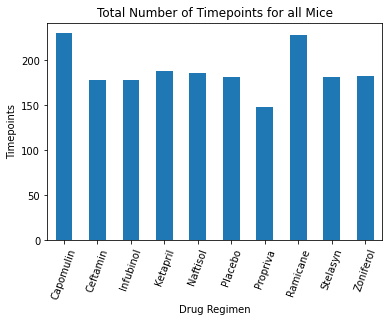

In [257]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barplot_df = cleandf.groupby("Drug Regimen").count()
barplot_df = barplot_df["Timepoint"]
barplot_df.plot.bar(y='Timepoint', rot=70)
plt.title("Total Number of Timepoints for all Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")


In [258]:
barplot_df.index.values

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

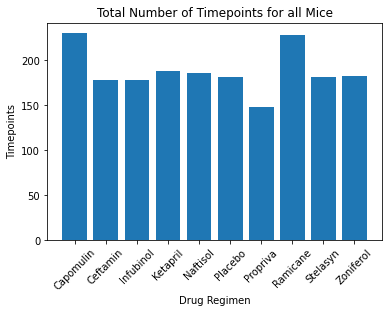

In [259]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x = barplot_df.index.values, height = barplot_df.values)
plt.xticks(rotation=45)
plt.title("Total Number of Timepoints for all Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

Text(0.5, 1.0, 'Distribution of males vs females')

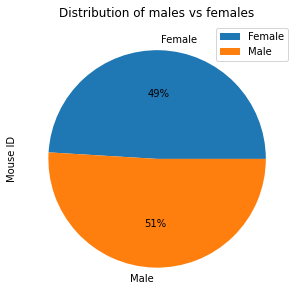

In [260]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieplot_df = cleandf.groupby("Sex").count()
pieplot_df.plot.pie(y = "Mouse ID", figsize=(5, 5), autopct='%1.0f%%')
plt.title("Distribution of males vs females")


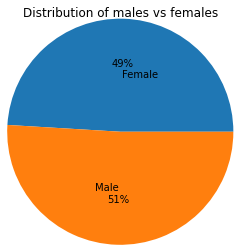

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = pieplot_df[("Mouse ID")]
y = "Female","Male"
plt.pie(x,labels=y,autopct='%1.f%%', radius =1.3, labeldistance =0.5)
plt.title("Distribution of males vs females")
plt.show()

## Quartiles, Outliers and Boxplots

In [262]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Last_TP = cleandf.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
Merge_df = Last_TP.merge(cleandf, how ="left", on = ["Mouse ID","Timepoint"])

Merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [263]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
#     Locate the rows which contain mice on each drug and get the tumor volumes    
#     add subset         
#     Determine outliers using upper and lower bounds


DrugReg = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
TumorVolData = []
for Drug in DrugReg:
    Final_Tumor_Vol = Merge_df[Merge_df["Drug Regimen"]== Drug]
    Final_Tumor_Vol = Final_Tumor_Vol["Tumor Volume (mm3)"]
    quartiles = Final_Tumor_Vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"The lower quartile of {Drug} is: {lowerq}")
    print(f"The upper quartile of {Drug} is: {upperq}")
    print(f"The interquartile range of {Drug} is: {iqr}")
    print(f"The the median of {Drug} is: {quartiles[0.5]} \n")
    print(f"{Drug} Values below {lower_bound} could be outliers.")
    print(f"{Drug} Values above {upper_bound} could be outliers.\n")
    print(f"Outliers for {Drug} is {Final_Tumor_Vol[Final_Tumor_Vol < lower_bound]} and {Final_Tumor_Vol[Final_Tumor_Vol > upper_bound]}\n")
    
    TumorVolData.append(Final_Tumor_Vol)

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 

Capomulin Values below 20.70456164999999 could be outliers.
Capomulin Values above 51.83201549 could be outliers.

Outliers for Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64) and Series([], Name: Tumor Volume (mm3), dtype: float64)

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 

Ramicane Values below 17.912664470000003 could be outliers.
Ramicane Values above 54.30681135 could be outliers.

Outliers for Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64) and Series([], Name: Tumor Volume (mm3), dtype: float64)

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The in

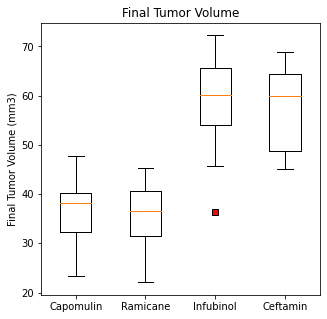

In [264]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize=(5,5))
Outliers = dict(markerfacecolor='r', marker='s')
plt.boxplot(TumorVolData, flierprops= Outliers)
plt.title('Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],DrugReg)
plt.show()


## Line and Scatter Plots

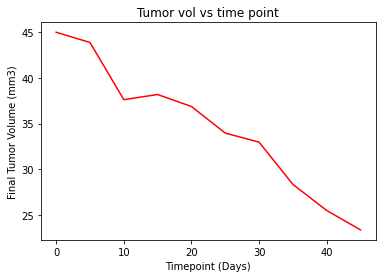

In [265]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_Mouse = cleandf[cleandf["Drug Regimen"] == "Capomulin"]
Capomulin_Mouse = cleandf[cleandf["Mouse ID"] == "s185"]
Capomulin_Mouse

plt.plot(Capomulin_Mouse["Timepoint"], Capomulin_Mouse["Tumor Volume (mm3)"], color="red")
plt.title('Tumor vol vs time point')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel ("Timepoint (Days)")
plt.show()

In [266]:
cleandf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


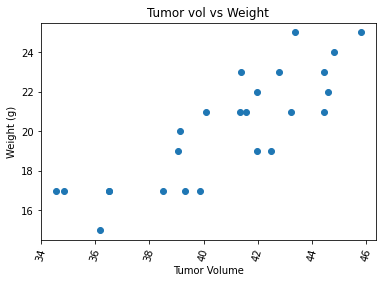

In [267]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Mouse = cleandf[cleandf["Drug Regimen"] == "Capomulin"]
CapomulinMice = Capomulin_Mouse.groupby(["Mouse ID"]).mean()
#CapomulinMice


plt.scatter(CapomulinMice["Tumor Volume (mm3)"], CapomulinMice["Weight (g)"])
plt.xticks(rotation=75)
plt.title('Tumor vol vs Weight')
plt.xlabel('Tumor Volume')
plt.ylabel('Weight (g)')

plt.show()


## Correlation and Regression

In [268]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [269]:
corr, _ = st.pearsonr(CapomulinMice["Tumor Volume (mm3)"], CapomulinMice["Weight (g)"])
print(f"The correlation with Tumor Vol: {round(corr, 2)}")


The correlation with Tumor Vol: 0.84


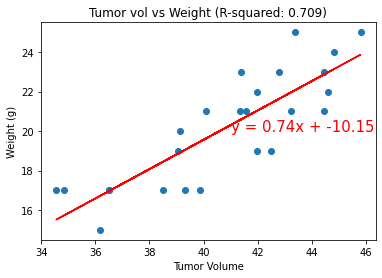

In [270]:
x_values = CapomulinMice["Tumor Volume (mm3)"]
y_values = CapomulinMice["Weight (g)"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(41,20),fontsize=15,color="red")

plt.title(f"Tumor vol vs Weight (R-squared: {round(rvalue**2, 3)})")
plt.scatter(CapomulinMice["Tumor Volume (mm3)"], CapomulinMice["Weight (g)"])
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight (g)')
plt.show()